Kategori
spam    100
ham     100
Name: count, dtype: int64
Kategori    0
Pesan       0
dtype: int64


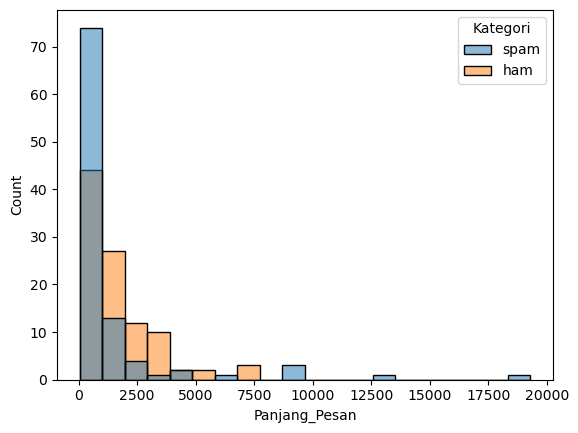

Accuracy: 0.95


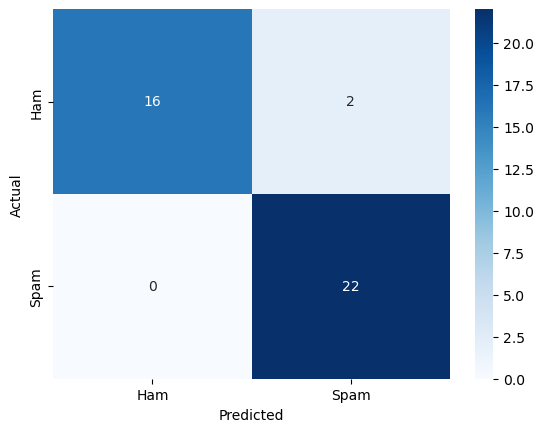

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.92      1.00      0.96        22

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40

Accuracy with threshold 0.4: 0.925


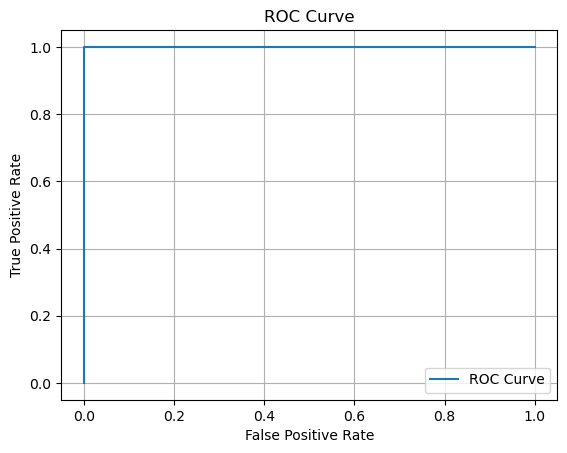

AUC Score: 1.0
Cross-validation scores: [0.95  0.95  0.825 0.95  0.975]
Mean CV accuracy: 0.9299999999999999
Best Parameters: {'C': 1}
Best Score: 0.94375


In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# 2. Import dataset
df = pd.read_csv("email_spam_100_100.csv")

# 3. Exploratory data analysis
print(df['Kategori'].value_counts())
print(df.isnull().sum())
df['Panjang_Pesan'] = df['Pesan'].apply(len)
sns.histplot(data=df, x='Panjang_Pesan', hue='Kategori', bins=20)
plt.show()

# 4. Declare feature vector and target variable
X = df['Pesan']
y = df['Kategori'].map({'spam': 1, 'ham': 0})  # Konversi label ke angka

# 5. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Feature engineering: TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 7. Feature scaling (opsional untuk TF-IDF, bisa dilewati jika pakai logistic regression)
# scaler = StandardScaler(with_mean=False)
# X_train_scaled = scaler.fit_transform(X_train_tfidf)
# X_test_scaled = scaler.transform(X_test_tfidf)

# 8. Model training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 9. Predict results
y_pred = model.predict(X_test_tfidf)

# 10. Check accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# 11. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 12. Classification metrics
print(classification_report(y_test, y_pred))

# 13. Adjusting the threshold
y_probs = model.predict_proba(X_test_tfidf)[:, 1]
threshold = 0.4  # ubah sesuai keperluan
y_pred_thresh = (y_probs >= threshold).astype(int)
print("Accuracy with threshold 0.4:", accuracy_score(y_test, y_pred_thresh))

# 14. ROC - AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_probs))

# 15. k-Fold Cross Validation
scores = cross_val_score(model, tfidf.transform(X), y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

# 16. Hyperparameter optimization using GridSearchCV
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
